
Total count for 00 and 11 are: {'11': 230, '10': 258, '01': 255, '00': 257}


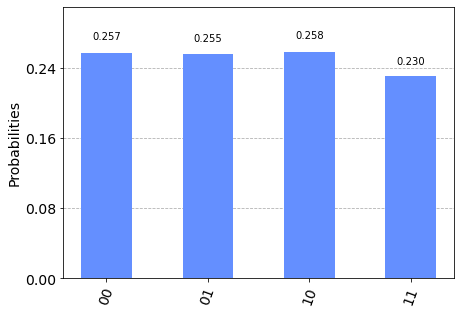

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)
circuit.h(1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()
plot_histogram(result.get_counts(circuit))

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])

In [10]:
from qiskit import *
from qiskit import IBMQ
IBMQ.save_account('a5342fe64e90c51c21200d5175cc795991f5ef6af4540d6b694765b7a1d1c0c742aa5747059d62d531304f6f58d5ae5a2171231aa507cbbaeb91581f49610c56')

configrc.store_credentials:WARNING:2021-07-28 14:37:38,201: Credentials already present. Set overwrite=True to overwrite.


In [11]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_5_yorktown')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts(circuit))

ibmqfactory.load_account:WARNING:2021-07-28 14:37:41,078: Credentials are already in use. The existing account in the session will be replaced.


AttributeError: module 'qiskit.circuit' has no attribute 'name'